In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [13]:
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv('Add_anomaly.csv',sep=',')
data.head()

,scaled_amount,scaled_time,V1,V2,V4,V5,V6,V7,V8,V11,...,V22,V23,V24,V25,V26,V27,V28,Class,scores,anomaly
0,-0.282401,0.409239,-0.412125,0.689071,-1.672189,3.549380,3.181706,0.578688,0.660969,0.183458,...,-0.754061,-0.018708,0.606893,-0.671096,0.107782,0.116460,0.027057,0,0.272523,1
1,-0.251520,-0.403482,-1.557997,1.445214,-0.703680,-0.619161,-0.351902,-0.171144,1.115511,1.013396,...,-0.202123,0.085877,0.234648,-0.265061,0.303707,0.168222,0.101471,0,0.305407,1
2,0.948788,-0.714987,-1.153532,1.096862,-0.317905,0.210462,-1.043646,0.969250,0.145975,0.029226,...,-1.221043,0.212406,-0.071539,-0.133931,-0.045221,0.095197,0.079633,0,0.282618,1
3,0.230839,0.377507,-0.063657,0.716875,-1.146666,1.619539,-1.418952,1.907872,-0.679603,-1.445790,...,0.808247,-0.255063,-0.606518,-0.222594,0.099614,0.211770,0.045021,0,0.260266,1
4,-0.279466,0.649127,-1.034736,0.581110,1.178578,-0.194626,0.390951,-0.161889,0.245898,-1.489924,...,-0.178392,-0.344198,-0.041099,0.328147,-0.515180,-0.113233,0.118757,0,0.302035,1


In [8]:
cols = data.columns.tolist()
cols = cols[-2:] + cols[:-2]
data = data[cols]
data.head()

,scores,anomaly,scaled_amount,scaled_time,V1,V2,V4,V5,V6,V7,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.272523,1,-0.282401,0.409239,-0.412125,0.689071,-1.672189,3.549380,3.181706,0.578688,...,0.111821,-0.332041,-0.754061,-0.018708,0.606893,-0.671096,0.107782,0.116460,0.027057,0
1,0.305407,1,-0.251520,-0.403482,-1.557997,1.445214,-0.703680,-0.619161,-0.351902,-0.171144,...,-0.142424,-0.053550,-0.202123,0.085877,0.234648,-0.265061,0.303707,0.168222,0.101471,0
2,0.282618,1,0.948788,-0.714987,-1.153532,1.096862,-0.317905,0.210462,-1.043646,0.969250,...,0.110291,-0.395159,-1.221043,0.212406,-0.071539,-0.133931,-0.045221,0.095197,0.079633,0
3,0.260266,1,0.230839,0.377507,-0.063657,0.716875,-1.146666,1.619539,-1.418952,1.907872,...,0.137095,0.184740,0.808247,-0.255063,-0.606518,-0.222594,0.099614,0.211770,0.045021,0
4,0.302035,1,-0.279466,0.649127,-1.034736,0.581110,1.178578,-0.194626,0.390951,-0.161889,...,-0.105769,-0.133762,-0.178392,-0.344198,-0.041099,0.328147,-0.515180,-0.113233,0.118757,0


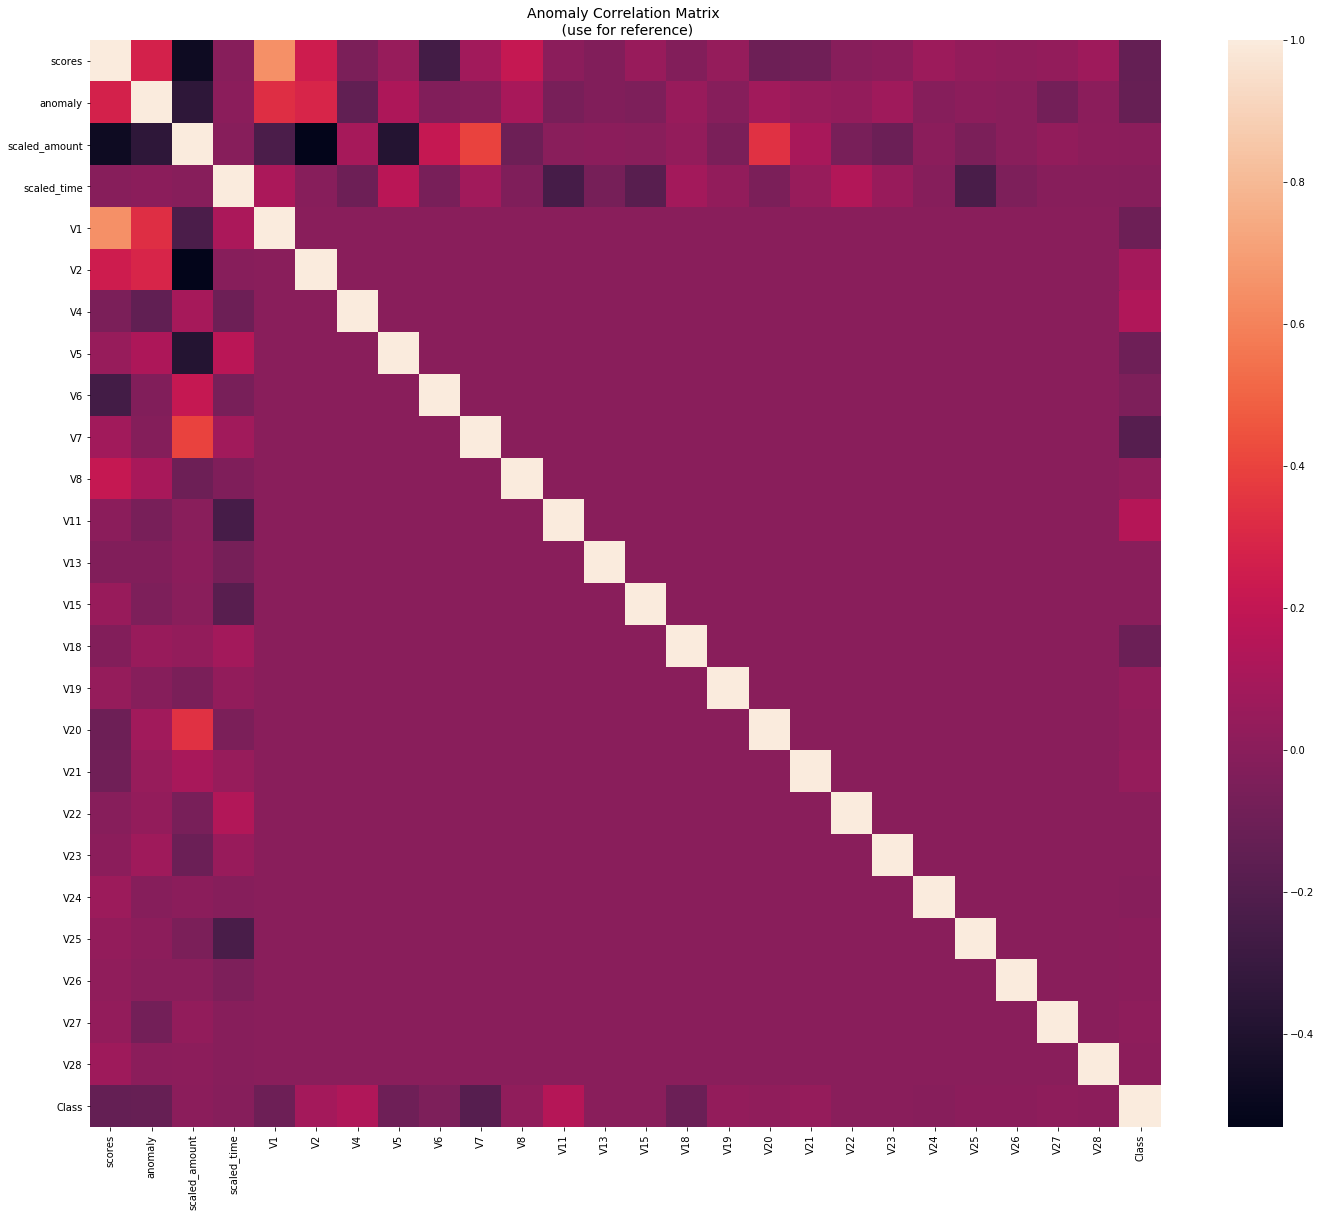

In [9]:
# Make sure we use the subsample in our correlation
fig, ax = plt.subplots(figsize=(24,20))

anomaly_corr = data.corr()
sns.heatmap(anomaly_corr, fmt="d", annot_kws={'size':20},ax=ax)
plt.title('Anomaly Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()
#plt.figure(figsize=(24,20))

We will ANN to predict if a given transaction is fraud or not  
We will use weights method to handle imbalance dataset

In [27]:
X=data.iloc[:,1:25]
y=data.iloc[:,-1]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [16]:
y_train.value_counts()

0    199035
1       329
Name: Class, dtype: int64

In [29]:
print(len(X.columns))
n_inputs=len(X.columns)

24


In [30]:
# define model
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define output layer
model.add(Dense(1, activation='sigmoid'))
# define loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0113
Epoch 2/10
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0041
Epoch 3/10
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0035
Epoch 4/10
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0031
Epoch 5/10
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0030
Epoch 6/10
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0028
Epoch 7/10
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0026
Epoch 8/10
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0025
Epoch 9/10
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0024
Epoch 10/10
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0023


In [31]:

y_pred1=model.predict(X_test)

print(roc_auc_score(y_test,y_pred1))

0.9573790847040136


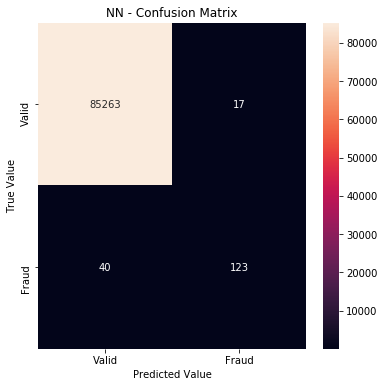

In [45]:
labels= ['Valid', 'Fraud'] 
conf_matrix=confusion_matrix(y_test, y_pred1.round()) 
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("NN - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()

#### Weighted NN

In [32]:
data['Class'].value_counts()[0]/data['Class'].value_counts()[1]

577.8760162601626

In [33]:
weights_assigned={0:1,1:550}

In [36]:
# define model
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define output layer
model.add(Dense(1, activation='sigmoid'))
# define loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train,y_train,class_weight=weights_assigned,epochs=10)

Epoch 1/10
6231/6231 [==============================] - 11s 2ms/step - loss: 0.7283
Epoch 2/10
6231/6231 [==============================] - 12s 2ms/step - loss: 0.3326
Epoch 3/10
6231/6231 [==============================] - 12s 2ms/step - loss: 0.2685
Epoch 4/10
6231/6231 [==============================] - 13s 2ms/step - loss: 0.2268
Epoch 5/10
6231/6231 [==============================] - 12s 2ms/step - loss: 0.2287
Epoch 6/10
6231/6231 [==============================] - 12s 2ms/step - loss: 0.1963
Epoch 7/10
6231/6231 [==============================] - 12s 2ms/step - loss: 0.2023
Epoch 8/10
6231/6231 [==============================] - 12s 2ms/step - loss: 0.1879
Epoch 9/10
6231/6231 [==============================] - 11s 2ms/step - loss: 0.1745
Epoch 10/10
6231/6231 [==============================] - 12s 2ms/step - loss: 0.1684


In [37]:
y_predf=model.predict(X_test)

print(roc_auc_score(y_test,y_predf))

0.9619257458649385


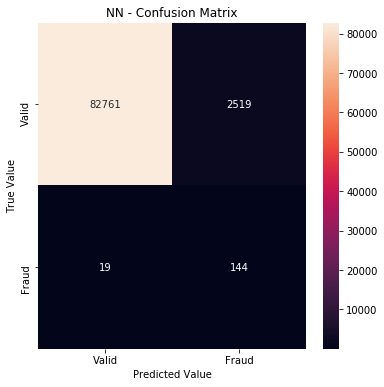

In [44]:
labels= ['Valid', 'Fraud'] 
conf_matrix=confusion_matrix(y_test, y_predf.round()) 
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("NN - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()

Though the area under ROC curve did not vary much for normal NN and weighted NN we can see a change in confusion matrix. In our application the most important quarter in confusion matrix is FN (Actually fraud but predicted as valid).  
Case1 (Normal NN): We have 40 cases where our model predicted fraud cases as valid. Here the model is more biased towards valid cases.  
Case2 (Weighted NN): We have only 19 cases where we predicted fraud cases as valid (reduced from case1). With weighted NN we have overcame the problem with imablanced dataset. 